In [5]:
import numpy as np 
import pandas as pd 
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns
import datetime
import random
import os
for dirname, _, filenames in os.walk('C:\\Users\\solva\\Desktop\\Health Compus'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\solva\Desktop\Health Compus\archive.zip
C:\Users\solva\Desktop\Health Compus\Data Set 1\main.ipynb
C:\Users\solva\Desktop\Health Compus\Data Set 1\main.py
C:\Users\solva\Desktop\Health Compus\Data Set 1\Student Mental health.csv
C:\Users\solva\Desktop\Health Compus\Data set 2\abc.csv
C:\Users\solva\Desktop\Health Compus\Data set 2\Student health Data.csv
C:\Users\solva\Desktop\Health Compus\Data set 2\try.py
C:\Users\solva\Desktop\Health Compus\Data set 2\Untitled-1.ipynb


In [6]:
df = pd.read_csv('C:\\Users\\solva\\Desktop\\Health Compus\\Data Set 1\\Student Mental health.csv')

In [7]:
df.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [8]:
df.shape

(101, 11)

In [9]:
df.dtypes

Timestamp                                        object
Choose your gender                               object
Age                                             float64
What is your course?                             object
Your current year of Study                       object
What is your CGPA?                               object
Marital status                                   object
Do you have Depression?                          object
Do you have Anxiety?                             object
Do you have Panic attack?                        object
Did you seek any specialist for a treatment?     object
dtype: object

In [10]:
df.nunique()

Timestamp                                       92
Choose your gender                               2
Age                                              7
What is your course?                            49
Your current year of Study                       7
What is your CGPA?                               6
Marital status                                   2
Do you have Depression?                          2
Do you have Anxiety?                             2
Do you have Panic attack?                        2
Did you seek any specialist for a treatment?     2
dtype: int64

In [11]:
df.isnull().sum()

Timestamp                                       0
Choose your gender                              0
Age                                             1
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64

In [12]:
df = df.dropna(how='any',axis=0) 

In [13]:
df.isnull().sum()

Timestamp                                       0
Choose your gender                              0
Age                                             0
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64

<!-- Data Visulization -->

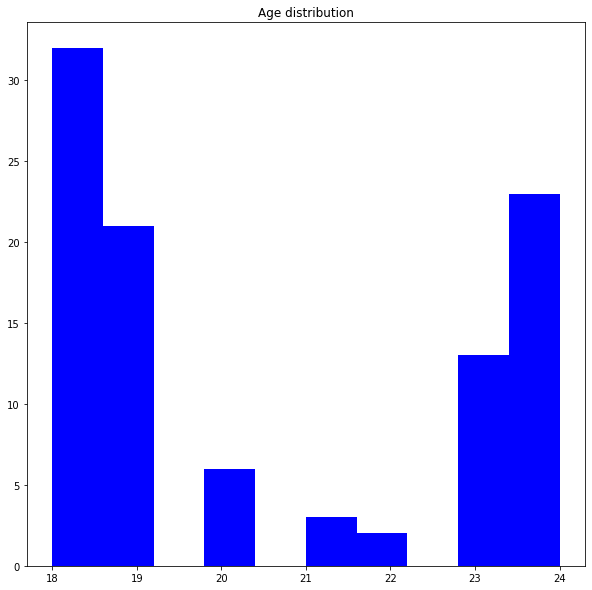

In [14]:
plt.figure(figsize=(10,10))
plt.hist(df['Age'],color='b')
plt.title("Age distribution");

In [15]:
df.rename(columns = {'Choose your gender': 'gender'}, inplace = True)

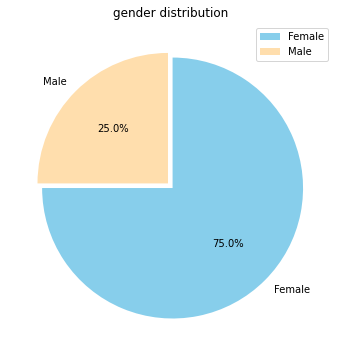

In [16]:
plt.figure(figsize=(12,6))
plt.title("gender distribution")
g = plt.pie(df.gender.value_counts(), explode=(0.025,0.025), labels=df.gender.value_counts().index, colors=['skyblue','navajowhite'],autopct='%1.1f%%', startangle=180);
plt.legend()
plt.show()

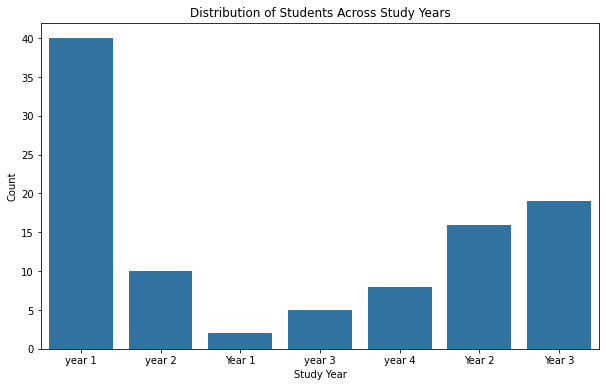

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Your current year of Study', data=df)
plt.title("Distribution of Students Across Study Years")
plt.xlabel("Study Year")
plt.ylabel("Count")
plt.show()

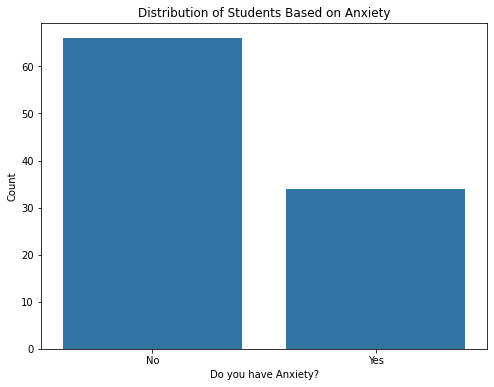

In [18]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Do you have Anxiety?', data=df)
plt.title("Distribution of Students Based on Anxiety")
plt.xlabel("Do you have Anxiety?")
plt.ylabel("Count")
plt.show()

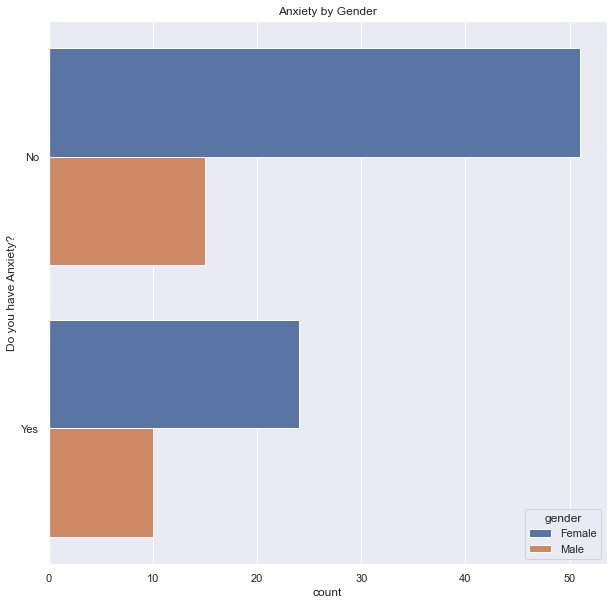

In [19]:
plt.figure(figsize=(10,10))
sns.set_theme(style="darkgrid")
ax = sns.countplot(y="Do you have Anxiety?", hue="gender", data=df)
plt.title("Anxiety by Gender")
plt.show()

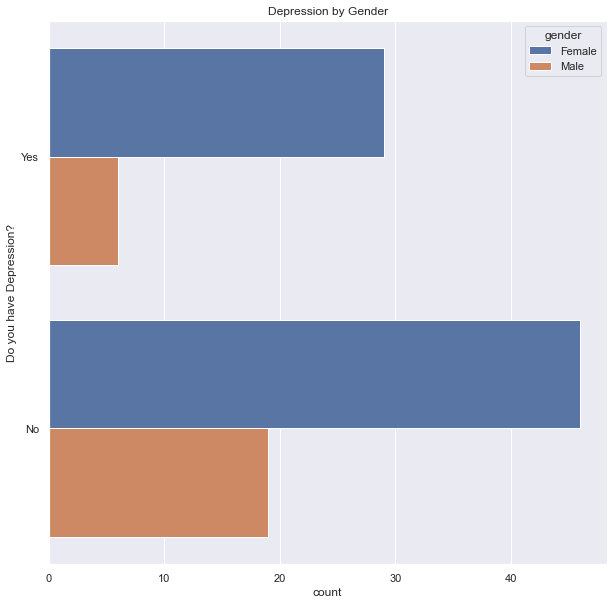

In [20]:
plt.figure(figsize=(10,10))
sns.set_theme(style="darkgrid")
ax = sns.countplot(y="Do you have Depression?", hue="gender", data=df)
plt.title("Depression by Gender")
plt.show()

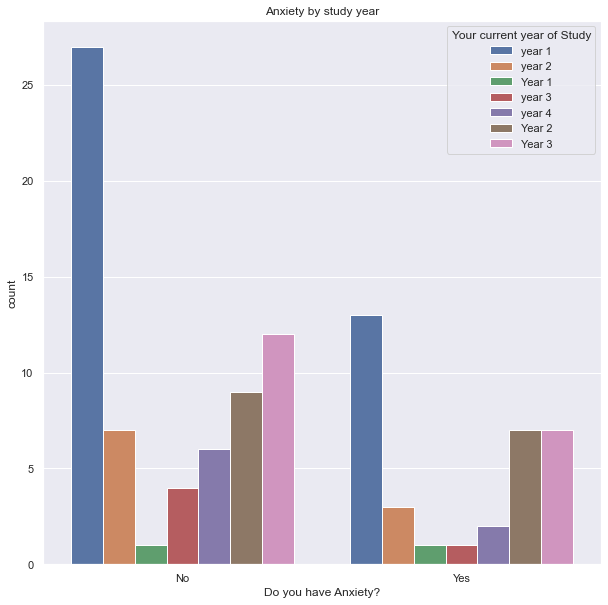

In [21]:
plt.figure(figsize=(10,10))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Do you have Anxiety?", hue="Your current year of Study", data=df)
plt.title("Anxiety by study year")
plt.show()

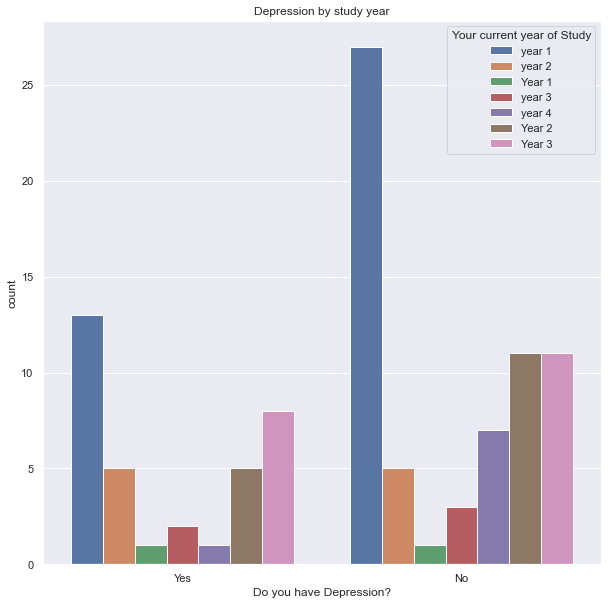

In [22]:
plt.figure(figsize=(10,10))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Do you have Depression?", hue="Your current year of Study", data=df)
plt.title("Depression by study year")
plt.show()

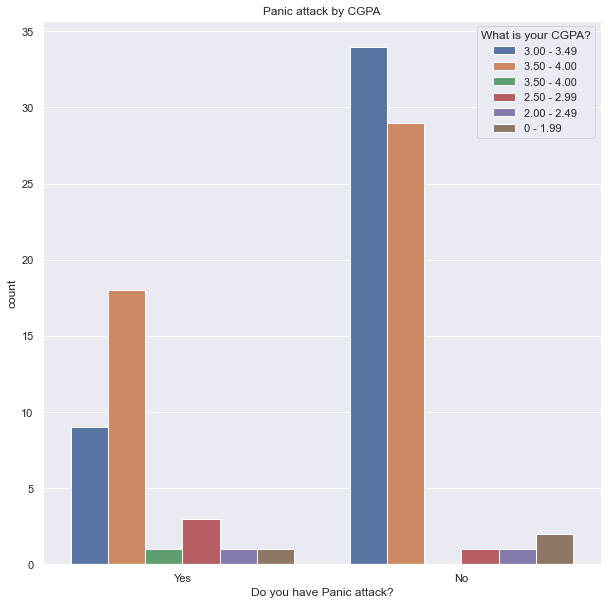

In [23]:
plt.figure(figsize=(10,10))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Do you have Panic attack?", hue="What is your CGPA?", data=df)
plt.title("Panic attack by CGPA")
plt.show()

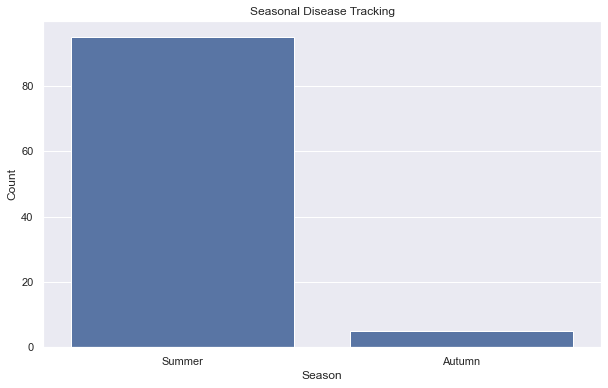

In [24]:
# Convert 'Timestamp' to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Extract month from 'Timestamp'
df['Month'] = df['Timestamp'].dt.month

# Define a function to map month to season
def get_season(month):
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Autumn'
    else:
        return 'Winter'

# Map month to season
df['Season'] = df['Month'].apply(get_season)

# Plot seasonal disease tracking
plt.figure(figsize=(10, 6))
sns.countplot(x='Season', data=df)
plt.title("Seasonal Disease Tracking")
plt.xlabel("Season")
plt.ylabel("Count")
plt.show()


In [25]:
# Convert 'Timestamp' to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Extract month from 'Timestamp'
df['Month'] = df['Timestamp'].dt.month

# Define a function to map month to season
def get_season(month):
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Autumn'
    else:
        return 'Winter'

# Map month to season
df['Season'] = df['Month'].apply(get_season)

# Define potential health issue columns
health_issue_columns = ['Do you have Depression?', 'Do you have Anxiety?', 'Do you have Panic attack?']

# Calculate the frequency of each health issue within each season
season_health_issue_counts = {}
for season in ['Spring', 'Summer', 'Autumn', 'Winter']:
    season_data = df[df['Season'] == season]
    counts = {}
    for column in health_issue_columns:
        counts[column] = season_data[column].sum()  # Count occurrences of each health issue
    season_health_issue_counts[season] = counts

# Determine the most affected health issue in each season
most_affected_health_issues = {}
for season, counts in season_health_issue_counts.items():
    most_affected_health_issues[season] = max(counts, key=counts.get)

print("Most affected health issues in each season:")
for season, issue in most_affected_health_issues.items():
    print(f"{season}: {issue}")


Most affected health issues in each season:
Spring: Do you have Depression?
Summer: Do you have Depression?
Autumn: Do you have Anxiety?
Winter: Do you have Depression?
